# Exercise 5: Analyse cumulative precipitation vs altitude (DTM)

The main idea behind this activity is to better understand the correlation between daily precipitation and station altitudes. This is accomplished by observing the cumulative precipitation data of these two counties from April 16th to August 16th, 2018. The altitude and hourly precipitation data are combined in a resulting data frame. The cumulative precipitation is obtained once these hourly data have been gathered and calculated. Then the information is used to create a map that depicts the association between the cumulative precipitation rate of each day over those four months and the station altitude. An additional graph is created to compare the altitude of the station metadata with that of the DTM. This DTM altitude sample file was created using the DTM 50m resolution file. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/tazbi/Downloads/Geoinformatics/Exam/MIE_2.02_WS2021_II_Exam-master/exercise_4/data/generated/DWD/hourly/precipitation/historical/prec_ts_merged_Ex5_data.csv',sep=";")

In [3]:
data.tail()

,station_id,mess_datum,prec_rate,day,date_from,date_to,altitude,latitude,longitude,name,state
257342,15000,2018-08-16 19:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen
257343,15000,2018-08-16 20:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen
257344,15000,2018-08-16 21:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen
257345,15000,2018-08-16 22:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen
257346,15000,2018-08-16 23:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen


In [4]:
data['mess_datum']=pd.to_datetime(data.mess_datum, format='%Y/%m/%d %H:%M:%S')

In [5]:
#data.insert(loc=5, column='day', value=(data.mess_datum.dt.date))ü

In [6]:
data.tail()

,station_id,mess_datum,prec_rate,day,date_from,date_to,altitude,latitude,longitude,name,state
257342,15000,2018-08-16 19:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen
257343,15000,2018-08-16 20:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen
257344,15000,2018-08-16 21:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen
257345,15000,2018-08-16 22:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen
257346,15000,2018-08-16 23:00:00,0.0,2018-08-16,2011-04-01,2022-03-11,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen


### Cumulating daily precipitation for four months may 2018 to august 2018

In [7]:
indx = data[data['station_id'].isin([216,389,390,613,644,796,934,1300,2483,2947,3028,3031,3098,3215,3499,4127,4313,4368,4400,
                                     4488,4692,5347,5360,5468,5480,5619,5699,6264,6276,6313,7330,13700,13713,14143,14145,14170,14171,14172,14173,14182,14183,14185,14186,14187])]
indx_nodata = data[data['station_id'].isin([14143,14145,14170,14171,14172,14173,14182,14183,14185,14186,14187])]

In [8]:
#indx_nodata
indx

,station_id,mess_datum,prec_rate,day,date_from,date_to,altitude,latitude,longitude,name,state
0,216,2018-04-16 00:00:00,0.0,2018-04-16,2004-10-01,2022-03-11,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen
1,216,2018-04-16 01:00:00,0.0,2018-04-16,2004-10-01,2022-03-11,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen
2,216,2018-04-16 02:00:00,0.0,2018-04-16,2004-10-01,2022-03-11,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen
3,216,2018-04-16 03:00:00,0.0,2018-04-16,2004-10-01,2022-03-11,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen
4,216,2018-04-16 04:00:00,0.0,2018-04-16,2004-10-01,2022-03-11,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen
...,...,...,...,...,...,...,...,...,...,...,...
254389,14182,NaT,NaN,NaN,2016-06-01,2022-03-11,193,51.2901,7.2759,Schwelm (Kl�rwerk),Nordrhein-Westfalen
254390,14183,NaT,NaN,NaN,2016-06-01,2022-03-11,297,51.1433,7.3656,H�ckeswagen/Talsperre,Nordrhein-Westfalen
254392,14185,NaT,NaN,NaN,2017-08-01,2022-03-11,304,51.6050,8.8175,Lichtenau-Ebbinghausen (HRB),Nordrhein-Westfalen
254393,14186,NaT,NaN,NaN,2017-08-01,2022-03-11,291,51.5319,8.7289,Gollentaler Grund (HRB),Nordrhein-Westfalen


In [9]:
indx

,station_id,mess_datum,prec_rate,day,date_from,date_to,altitude,latitude,longitude,name,state
0,216,2018-04-16 00:00:00,0.0,2018-04-16,2004-10-01,2022-03-11,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen
1,216,2018-04-16 01:00:00,0.0,2018-04-16,2004-10-01,2022-03-11,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen
2,216,2018-04-16 02:00:00,0.0,2018-04-16,2004-10-01,2022-03-11,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen
3,216,2018-04-16 03:00:00,0.0,2018-04-16,2004-10-01,2022-03-11,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen
4,216,2018-04-16 04:00:00,0.0,2018-04-16,2004-10-01,2022-03-11,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen
...,...,...,...,...,...,...,...,...,...,...,...
254389,14182,NaT,NaN,NaN,2016-06-01,2022-03-11,193,51.2901,7.2759,Schwelm (Kl�rwerk),Nordrhein-Westfalen
254390,14183,NaT,NaN,NaN,2016-06-01,2022-03-11,297,51.1433,7.3656,H�ckeswagen/Talsperre,Nordrhein-Westfalen
254392,14185,NaT,NaN,NaN,2017-08-01,2022-03-11,304,51.6050,8.8175,Lichtenau-Ebbinghausen (HRB),Nordrhein-Westfalen
254393,14186,NaT,NaN,NaN,2017-08-01,2022-03-11,291,51.5319,8.7289,Gollentaler Grund (HRB),Nordrhein-Westfalen


In [10]:
#<converting to daily precipitation rate from hourly precipitation rate
temp1 = indx.groupby(['day','station_id','date_from','date_to','longitude','latitude','altitude','name','state'])['prec_rate'].sum().to_frame(name = 'daily_prep').reset_index()

In [11]:
temp1
#c = df_1.loc[:,"station_id"].unique()
#len(c)

,day,station_id,date_from,date_to,longitude,latitude,altitude,name,state,daily_prep
0,2018-04-16,216,2004-10-01,2022-03-11,7.8807,51.1143,298,Attendorn-Neulisternohl,Nordrhein-Westfalen,0.0
1,2018-04-16,389,2009-11-01,2022-03-11,8.4318,51.0148,436,"Berleburg, Bad-Arfeld",Nordrhein-Westfalen,0.0
2,2018-04-16,390,2004-07-01,2022-03-11,8.3683,50.9837,610,"Berleburg, Bad-St�nzel",Nordrhein-Westfalen,0.0
3,2018-04-16,613,2004-11-01,2022-03-11,9.2324,51.5677,206,Borgentreich,Nordrhein-Westfalen,0.0
4,2018-04-16,644,2005-01-01,2022-03-11,9.1738,51.7049,150,Brakel,Nordrhein-Westfalen,0.0
...,...,...,...,...,...,...,...,...,...,...
4043,2018-08-16,6276,2004-11-01,2019-11-02,7.7813,51.4895,235,Fr�ndenberg-Hohenheide,Nordrhein-Westfalen,0.0
4044,2018-08-16,6313,2004-12-01,2022-03-11,7.4672,51.2488,440,Breckerfeld-Wengeberg,Nordrhein-Westfalen,0.0
4045,2018-08-16,7330,2005-10-01,2022-03-11,7.9780,51.4633,159,Arnsberg-Neheim,Nordrhein-Westfalen,0.0
4046,2018-08-16,13700,2008-05-01,2022-03-11,7.3412,51.3329,203,Gevelsberg-Oberbr�king,Nordrhein-Westfalen,0.0


In [12]:
#Daily precipitation rate to total overall rainfall for four months of 2018 (May to August)
temp2 = temp1.groupby(['station_id','date_from','date_to','longitude','latitude','altitude','name','state'])['daily_prep'].sum().to_frame(name = 'total_rainfall_value').reset_index()

In [13]:
temp2

,station_id,date_from,date_to,longitude,latitude,altitude,name,state,total_rainfall_value
0,216,2004-10-01,2022-03-11,7.8807,51.1143,298,Attendorn-Neulisternohl,Nordrhein-Westfalen,273.7
1,389,2009-11-01,2022-03-11,8.4318,51.0148,436,"Berleburg, Bad-Arfeld",Nordrhein-Westfalen,175.6
2,390,2004-07-01,2022-03-11,8.3683,50.9837,610,"Berleburg, Bad-St�nzel",Nordrhein-Westfalen,179.2
3,613,2004-11-01,2022-03-11,9.2324,51.5677,206,Borgentreich,Nordrhein-Westfalen,130.1
4,644,2005-01-01,2022-03-11,9.1738,51.7049,150,Brakel,Nordrhein-Westfalen,115.0
5,796,2004-11-01,2022-03-11,8.1257,50.7556,412,Burbach-W�rgendorf,Nordrhein-Westfalen,168.0
6,934,2004-10-01,2022-03-11,8.5658,51.7835,88,Delbr�ck,Nordrhein-Westfalen,116.8
7,1300,2004-06-01,2022-03-11,8.1565,51.2540,351,Eslohe,Nordrhein-Westfalen,201.8
8,2483,1995-10-12,2022-03-11,8.4891,51.1803,839,Kahler Asten,Nordrhein-Westfalen,222.2
9,2947,2006-10-01,2022-03-11,8.0348,51.1333,286,Lennestadt-Theten,Nordrhein-Westfalen,291.1


In [14]:
data= data.set_index('station_id')
data.head()

,mess_datum,prec_rate,day,date_from,date_to,altitude,latitude,longitude,name,state
station_id,,,,,,,,,,
216,2018-04-16 00:00:00,0.0,2018-04-16,2004-10-01,2022-03-11,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen
216,2018-04-16 01:00:00,0.0,2018-04-16,2004-10-01,2022-03-11,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen
216,2018-04-16 02:00:00,0.0,2018-04-16,2004-10-01,2022-03-11,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen
216,2018-04-16 03:00:00,0.0,2018-04-16,2004-10-01,2022-03-11,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen
216,2018-04-16 04:00:00,0.0,2018-04-16,2004-10-01,2022-03-11,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen


In [15]:
temp2 = temp2.set_index('station_id')
temp2.head()

,date_from,date_to,longitude,latitude,altitude,name,state,total_rainfall_value
station_id,,,,,,,,
216,2004-10-01,2022-03-11,7.8807,51.1143,298,Attendorn-Neulisternohl,Nordrhein-Westfalen,273.7
389,2009-11-01,2022-03-11,8.4318,51.0148,436,"Berleburg, Bad-Arfeld",Nordrhein-Westfalen,175.6
390,2004-07-01,2022-03-11,8.3683,50.9837,610,"Berleburg, Bad-St�nzel",Nordrhein-Westfalen,179.2
613,2004-11-01,2022-03-11,9.2324,51.5677,206,Borgentreich,Nordrhein-Westfalen,130.1
644,2005-01-01,2022-03-11,9.1738,51.7049,150,Brakel,Nordrhein-Westfalen,115.0


In [16]:
#df_2 = df_2.join(data2['altitude'])

In [17]:
temp2.tail() #check altitudes!!! some are wrong

,date_from,date_to,longitude,latitude,altitude,name,state,total_rainfall_value
station_id,,,,,,,,
6276,2004-11-01,2019-11-02,7.7813,51.4895,235,Fr�ndenberg-Hohenheide,Nordrhein-Westfalen,172.8
6313,2004-12-01,2022-03-11,7.4672,51.2488,440,Breckerfeld-Wengeberg,Nordrhein-Westfalen,216.8
7330,2005-10-01,2022-03-11,7.9780,51.4633,159,Arnsberg-Neheim,Nordrhein-Westfalen,214.2
13700,2008-05-01,2022-03-11,7.3412,51.3329,203,Gevelsberg-Oberbr�king,Nordrhein-Westfalen,180.8
13713,2007-11-01,2022-03-11,7.6289,51.0899,386,Meinerzhagen-Redlendorf,Nordrhein-Westfalen,182.9


## Relationship between Total Rainfall and Altitude

In [18]:
temp2.reset_index(level=0, inplace=True)

In [19]:
temp2 = temp2.set_index('station_id')
temp2

,date_from,date_to,longitude,latitude,altitude,name,state,total_rainfall_value
station_id,,,,,,,,
216,2004-10-01,2022-03-11,7.8807,51.1143,298,Attendorn-Neulisternohl,Nordrhein-Westfalen,273.7
389,2009-11-01,2022-03-11,8.4318,51.0148,436,"Berleburg, Bad-Arfeld",Nordrhein-Westfalen,175.6
390,2004-07-01,2022-03-11,8.3683,50.9837,610,"Berleburg, Bad-St�nzel",Nordrhein-Westfalen,179.2
613,2004-11-01,2022-03-11,9.2324,51.5677,206,Borgentreich,Nordrhein-Westfalen,130.1
644,2005-01-01,2022-03-11,9.1738,51.7049,150,Brakel,Nordrhein-Westfalen,115.0
796,2004-11-01,2022-03-11,8.1257,50.7556,412,Burbach-W�rgendorf,Nordrhein-Westfalen,168.0
934,2004-10-01,2022-03-11,8.5658,51.7835,88,Delbr�ck,Nordrhein-Westfalen,116.8
1300,2004-06-01,2022-03-11,8.1565,51.2540,351,Eslohe,Nordrhein-Westfalen,201.8
2483,1995-10-12,2022-03-11,8.4891,51.1803,839,Kahler Asten,Nordrhein-Westfalen,222.2


In [20]:
temp2 = temp2.sort_values('altitude')
temp2

,date_from,date_to,longitude,latitude,altitude,name,state,total_rainfall_value
station_id,,,,,,,,
5480,2003-09-10,2022-03-11,7.8879,51.5763,85,Werl,Nordrhein-Westfalen,169.3
934,2004-10-01,2022-03-11,8.5658,51.7835,88,Delbr�ck,Nordrhein-Westfalen,116.8
3031,2004-07-01,2022-03-11,8.3945,51.6336,92,Lippstadt-B�kenf�rde,Nordrhein-Westfalen,157.1
4368,2004-10-01,2022-03-11,8.5796,51.7098,93,Salzkotten,Nordrhein-Westfalen,140.8
644,2005-01-01,2022-03-11,9.1738,51.7049,150,Brakel,Nordrhein-Westfalen,115.0
3028,1995-09-01,2022-03-11,8.8388,51.7854,157,"Lippspringe, Bad",Nordrhein-Westfalen,179.3
7330,2005-10-01,2022-03-11,7.9780,51.4633,159,Arnsberg-Neheim,Nordrhein-Westfalen,214.2
4400,2004-08-01,2022-03-11,8.1808,51.5439,171,"Sassendorf, Bad-Beusingsen",Nordrhein-Westfalen,131.7
13700,2008-05-01,2022-03-11,7.3412,51.3329,203,Gevelsberg-Oberbr�king,Nordrhein-Westfalen,180.8


In [21]:
temp3 = temp2.sort_values('station_id')
temp3

,date_from,date_to,longitude,latitude,altitude,name,state,total_rainfall_value
station_id,,,,,,,,
216,2004-10-01,2022-03-11,7.8807,51.1143,298,Attendorn-Neulisternohl,Nordrhein-Westfalen,273.7
389,2009-11-01,2022-03-11,8.4318,51.0148,436,"Berleburg, Bad-Arfeld",Nordrhein-Westfalen,175.6
390,2004-07-01,2022-03-11,8.3683,50.9837,610,"Berleburg, Bad-St�nzel",Nordrhein-Westfalen,179.2
613,2004-11-01,2022-03-11,9.2324,51.5677,206,Borgentreich,Nordrhein-Westfalen,130.1
644,2005-01-01,2022-03-11,9.1738,51.7049,150,Brakel,Nordrhein-Westfalen,115.0
796,2004-11-01,2022-03-11,8.1257,50.7556,412,Burbach-W�rgendorf,Nordrhein-Westfalen,168.0
934,2004-10-01,2022-03-11,8.5658,51.7835,88,Delbr�ck,Nordrhein-Westfalen,116.8
1300,2004-06-01,2022-03-11,8.1565,51.2540,351,Eslohe,Nordrhein-Westfalen,201.8
2483,1995-10-12,2022-03-11,8.4891,51.1803,839,Kahler Asten,Nordrhein-Westfalen,222.2


In [22]:
HSK_roi = [7330,6264,4488,2483,3215,1300]
temp4 = temp3.loc[HSK_roi].sort_values('total_rainfall_value')
temp4

,date_from,date_to,longitude,latitude,altitude,name,state,total_rainfall_value
station_id,,,,,,,,
6264,2004-06-01,2022-03-11,8.6500,51.4140,457,Brilon-Th�len,Nordrhein-Westfalen,132.9
3215,2007-06-01,2022-03-11,8.7125,51.1683,375,Medebach-Berge,Nordrhein-Westfalen,189.3
1300,2004-06-01,2022-03-11,8.1565,51.2540,351,Eslohe,Nordrhein-Westfalen,201.8
7330,2005-10-01,2022-03-11,7.9780,51.4633,159,Arnsberg-Neheim,Nordrhein-Westfalen,214.2
2483,1995-10-12,2022-03-11,8.4891,51.1803,839,Kahler Asten,Nordrhein-Westfalen,222.2
4488,2006-08-01,2022-03-11,8.2672,51.2127,443,Schmallenberg-Sellinghausen,Nordrhein-Westfalen,261.8


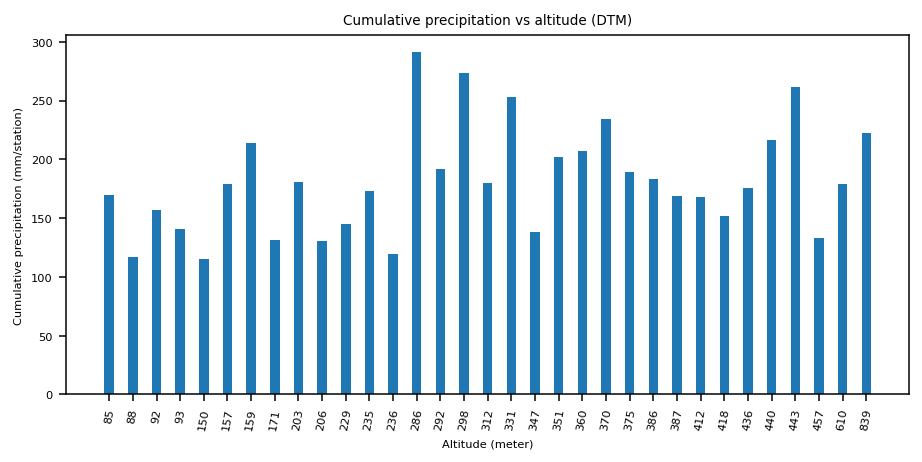

In [24]:
w = 0.4
fig = plt.figure(dpi= 136, figsize=(8,3.5))
plt.rcParams.update({'font.size': 6})

temp2 = temp2.sort_values('altitude')
bar1 = np.arange(len(temp2['altitude']))

plt.bar(bar1,temp2['total_rainfall_value'],w)

plt.xlabel('Altitude (meter)')
plt.ylabel('Cumulative precipitation (mm/station)')
plt.title('Cumulative precipitation vs altitude (DTM)')
plt.xticks(bar1,temp2['altitude'],rotation=80)
plt.savefig('C:/Users/tazbi/Desktop/Geo Exam/Final Exercise/Exercise 5/AltitudevsRainfall')

plt.show()

In [25]:
temp2
temp2.to_csv('C:/Users/tazbi/Downloads/Geoinformatics/Exam/MIE_2.02_WS2021_II_Exam-master/exercise_8/Cumulative_prec_data2.csv',sep=";")

In [26]:
filepathname = "overall_rainfall_13_counties.csv"
print("temp2 saved to: %s" % (filepathname))
temp2 = temp2.sort_values('station_id')
temp2.to_csv(filepathname,sep=";")
temp2

temp2 saved to: overall_rainfall_13_counties.csv


,date_from,date_to,longitude,latitude,altitude,name,state,total_rainfall_value
station_id,,,,,,,,
216,2004-10-01,2022-03-11,7.8807,51.1143,298,Attendorn-Neulisternohl,Nordrhein-Westfalen,273.7
389,2009-11-01,2022-03-11,8.4318,51.0148,436,"Berleburg, Bad-Arfeld",Nordrhein-Westfalen,175.6
390,2004-07-01,2022-03-11,8.3683,50.9837,610,"Berleburg, Bad-St�nzel",Nordrhein-Westfalen,179.2
613,2004-11-01,2022-03-11,9.2324,51.5677,206,Borgentreich,Nordrhein-Westfalen,130.1
644,2005-01-01,2022-03-11,9.1738,51.7049,150,Brakel,Nordrhein-Westfalen,115.0
796,2004-11-01,2022-03-11,8.1257,50.7556,412,Burbach-W�rgendorf,Nordrhein-Westfalen,168.0
934,2004-10-01,2022-03-11,8.5658,51.7835,88,Delbr�ck,Nordrhein-Westfalen,116.8
1300,2004-06-01,2022-03-11,8.1565,51.2540,351,Eslohe,Nordrhein-Westfalen,201.8
2483,1995-10-12,2022-03-11,8.4891,51.1803,839,Kahler Asten,Nordrhein-Westfalen,222.2


## Altitude comparison of Station Metadata vs DTM

In [27]:
dtm = pd.read_csv('DTM altitudes sample.csv',sep=",")

In [28]:
dtm.head()

,station_id,date_from,date_to,altitude,latitude,longitude,name,state,dtm_altitude1
0,3098,1995/09/01,2022/03/02,387,51.2452,7.6425,L�denscheid,Nordrhein-Westfalen,388.000000
1,4127,2005/01/01,2022/03/02,347,50.9906,7.6958,Reichshof-Eckenhagen,Nordrhein-Westfalen,346.500000
2,5619,2004/12/01,2022/03/02,360,51.1637,7.4234,Wipperf�rth-Gardeweg,Nordrhein-Westfalen,360.300018
3,6313,2004/12/01,2022/03/02,440,51.2488,7.4672,Breckerfeld-Wengeberg,Nordrhein-Westfalen,439.899994
4,13713,2007/11/01,2022/03/02,386,51.0899,7.6289,Meinerzhagen-Redlendorf,Nordrhein-Westfalen,387.800018


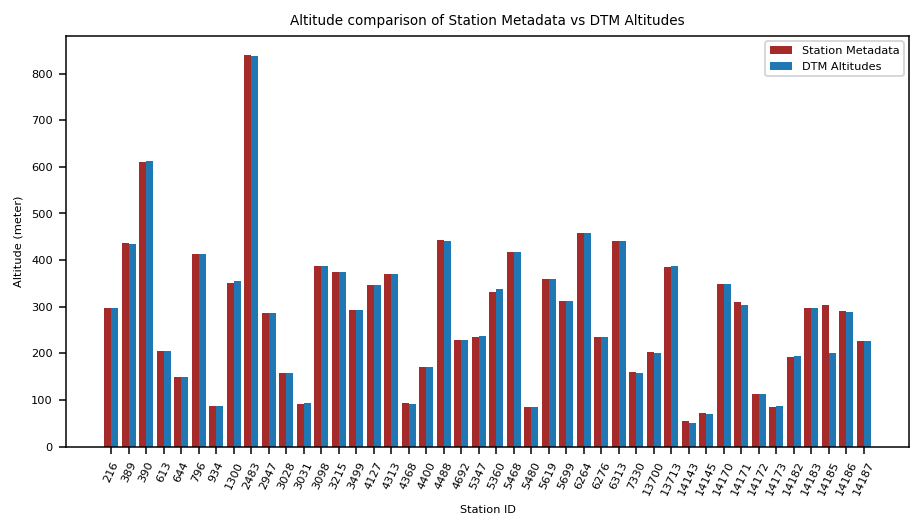

In [30]:
w = 0.4
fig = plt.figure(dpi= 136, figsize=(8,4))

dtm = dtm.sort_values(by=['station_id'])
bar1 = np.arange(len(dtm['station_id']))
bar2 = [i+w for i in bar1]

plt.bar(bar1,dtm['altitude'],w,label='Station Metadata', color='brown')
plt.bar(bar2,dtm['dtm_altitude1'],w,label='DTM Altitudes')

plt.xlabel('Station ID')
plt.ylabel('Altitude (meter)')
plt.title('Altitude comparison of Station Metadata vs DTM Altitudes')
plt.xticks(bar1+w/2,dtm['station_id'],rotation=65)
plt.legend()
plt.savefig('C:/Users/tazbi/Downloads/Geoinformatics/Exam/MIE_2.02_WS2021_II_Exam-master/exercise_5/Altitude_Comparison')

plt.show()